<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Image-processing" data-toc-modified-id="Image-processing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Image processing</a></span><ul class="toc-item"><li><span><a href="#Task-1:" data-toc-modified-id="Task-1:-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Task 1:</a></span><ul class="toc-item"><li><span><a href="#Reading-data" data-toc-modified-id="Reading-data-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Reading data</a></span></li><li><span><a href="#Visualizing-the-location-of-cursor" data-toc-modified-id="Visualizing-the-location-of-cursor-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Visualizing the location of cursor</a></span></li><li><span><a href="#Exporting-a-video-file" data-toc-modified-id="Exporting-a-video-file-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Exporting a video file</a></span></li><li><span><a href="#Average-location-of-cursor" data-toc-modified-id="Average-location-of-cursor-1.1.4"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>Average location of cursor</a></span></li><li><span><a href="#Visualizing-the-heatmap" data-toc-modified-id="Visualizing-the-heatmap-1.1.5"><span class="toc-item-num">1.1.5&nbsp;&nbsp;</span>Visualizing the heatmap</a></span></li></ul></li><li><span><a href="#Task-2" data-toc-modified-id="Task-2-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Task 2</a></span></li></ul></li></ul></div>

# Image processing 

## Task 1: 
### Reading data
you are given a text file `mousePos.txt` which contain the `(x,y)` position of a mouse cursor. Extract the data of the cursor positions in an automated manner.

In [25]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import csv

In [26]:
mouse_coords = []
timestamps = []
with open("mousePos.txt") as f:
    for line in f:
        total_list = line.split(",")
        timestamp = total_list[1].split(":")[-1]
        timestamps.append(float(timestamp))
        mouse_list = total_list[-1].split()
        mouse_x, mouse_y = mouse_list[1].split(":")[-1], mouse_list[2].split(":")[-1]
        mouse_coords.append((int(mouse_x), int(mouse_y)))

mouse_coords = np.asarray(mouse_coords)
timestamps = np.asarray(timestamps)
print(len(mouse_coords))
print(len(timestamps))

13618
13618


### Visualizing the location of cursor 
❓ Visualize the current and the last 20 positions of the cursor with the image `Desktop.png` as a background image.

![Desktop.png](./Desktop.png)

1080 3840


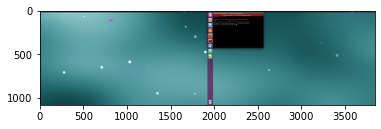

In [27]:
# Assuming current=last position and cv2 origin in upper left corner

bg_img = cv2.imread("Desktop.png")
height, width, channels = bg_img.shape
print(height, width)
img = bg_img.copy()
frames = []

for i in range(20):
    idx = -1-i
    img = cv2.circle(img, mouse_coords[idx], 10, (255, 0, 255), 1)
    frame = cv2.circle(bg_img.copy(), mouse_coords[idx], 10, (255, 0, 255), -1)
    frames.append(frame)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

### Exporting a video file
❓ Export the results of the previous task into a vidoe file

In [28]:
fourcc = cv2.VideoWriter_fourcc(*'MP42')
video = cv2.VideoWriter('mousemove.avi', fourcc, 15, (width, height))

for i in range(len(frames)):
    video.write(frames[i])
video.release()

### Average location of cursor
❓ Calcualte the average positon of the cursor, and save the content into csv file with proper header. 

***repeate the process 10 times and visualize the average cursor position***

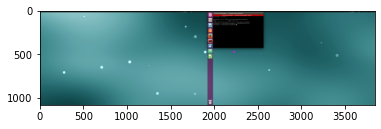

In [29]:
# 10 times?

# Calculate average
xs = mouse_coords[:,0]
ys = mouse_coords[:,1]
avrg_x = xs.mean()
avrg_y = ys.mean()

# Write CSV
header = "avrg_x, avrg_y"
with open("avrg.csv", "w") as csv_file:
    csv_file.write(header+"\n")
    csv_file.write(str(avrg_x) + ", " + str(avrg_y))

# Display average cursor position
arvg_img = cv2.circle(bg_img.copy(), (int(avrg_x), int(avrg_y)), 10, (255, 0, 255), -1)
plt.imshow(cv2.cvtColor(arvg_img, cv2.COLOR_BGR2RGB))
plt.show()

### Visualizing the heatmap
❓ Calculate and visualize a Heatmap, stating the amount of time spent in each location. 

💡  
As an example you can look at 'Heatmap_example.jpg'.
    ![](./Heatmap_example.jpg)  




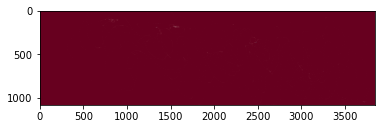

In [30]:
import matplotlib.cm as cmap

# 1) Calculate the duration for each mouse position
duration_dict = {}
duration_dict["0"] = timestamps[0]
for i in range(len(timestamps)-1):
    duration_dict[str(i+1)] = timestamps[i+1]-timestamps[i]

# 2) Create a grid of image size and sum the times at each pixel
grid = np.zeros((height, width))
# for x in range(width):
#     for y in range(height):
#         idx = np.where((mouse_coords[:,0] == x) & (mouse_coords[:,1] == y))[0]

for i in range(len(mouse_coords)):
    x, y = mouse_coords[i]
    grid[y,x] += duration_dict[str(i)]

# 3) Visualize
grid = grid / np.amax(grid) * 255
colormap = plt.get_cmap('RdBu')
heatmap = (colormap(grid) * 2**16).astype(np.uint16)[:,:,:3]
heatmap = (heatmap/256).astype(np.uint8)
plt.imshow(heatmap)
plt.show()


### This doesn't look quite satisfying, but I couldn't find my mistake .....

## Task 2


Draw a box `(side length 20cm)` around the position of the head in `face.jpg`  
![face.png](./face.png)

Camera parameters are `cx=250, cy=375, fx=fy=716`.  
Head position is (in mm relative to camera) `(212, -168, 712)` with rotation (Rodrigues) `(.35, .59, -.30)`.  
For more information look the documention of [openCV](https://docs.opencv.org/modules/calib3d/doc/camera_calibration_and_3d_reconstruction.html).  

Save the overlayed image. The result should look like `face_example.jpg`, 
**make sure to choose thinner lines**


![face_example.jpg](./face_example.jpg)

1080 3840


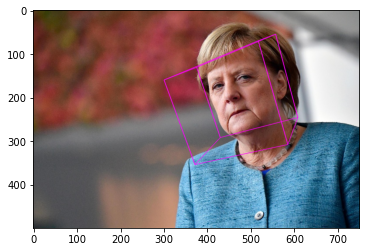

True

In [31]:
from numpy import array, int32


merkel_face = cv2.imread("face.jpg")
height, width, channels = bg_img.shape
print(height, width)

pts3d_box = np.array([[-100,-100,100], [100,-100,100], [100,100,100], [-100,100,100], 
            [-100,-100,-100], [100,-100,-100], [100,100,-100], [-100,100,-100] ], float)
indices = np.array([[0,1,2,3], [1,5,6,2], [4,5,6,7], [0,4,7,3]], int32)

K = np.array([[716.0, 0, 250.0],
             [0, 716.0, 375.0],
             [0, 0, 1.0]], float)

R = np.array([0.35, 0.59, -0.3], float)

t = np.array([212, -168, 712], float)

pts2d_box = np.floor(cv2.projectPoints(pts3d_box, R, t, K, None)[0]).astype(int)

merkel_face = cv2.polylines(merkel_face, pts2d_box[indices], True, (255, 0, 255), 1, cv2.LINE_AA)

plt.imshow(cv2.cvtColor(merkel_face, cv2.COLOR_BGR2RGB))
plt.show()

cv2.imwrite("merkel.png", merkel_face)